In [1]:
# !python -m pip install pycocotools

from pycocotools.coco import COCO
import os
import zipfile
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import requests
import pylab

%matplotlib inline

pylab.rcParams['figure.figsize'] = (10.0, 8.0)

# Create dataset folder
if not os.path.exists('./coco'):
    os.mkdir('./coco')

In [2]:
# Download the data
train_data_url = 'http://images.cocodataset.org/zips/train2014.zip'
validation_data_url = 'http://images.cocodataset.org/annotations/annotations_trainval2014.zip'

def download_coco(url, name):
    r = requests.get(url, stream=True)
    with open(name, 'wb') as f:
        for chunk in r.iter_content(chunk_size=1024):
            if chunk:
                f.write(chunk)

if not os.path.exists('./coco/annotations.zip'):
    download_coco(validation_data_url, './coco/annotations.zip')
    
if not os.path.exists('./coco/train2014.zip'):
    download_coco(train_data_url, './coco/train2014.zip')

In [3]:
# Unzip the files
def unzip(file_path):
    zip_file = zipfile.ZipFile(file_path, 'r')
    for file in zip_file.namelist():
        zip_file.extract(file, './coco')
        
if not os.path.exists('./coco/annotations/'):
    unzip('./coco/annotations.zip')

if not os.path.exists('./coco/train2014'):
    unzip('./coco/train2014.zip')

In [4]:
# Get current pwd
ROOT_DIR = os.getcwd()

# Set coco dataset dir
COCO_DATA_PATH = os.path.join(ROOT_DIR, 'coco')

data_dir = COCO_DATA_PATH
data_year = 'train2014'
annotation_filename = 'instances_%s.json'%(data_year)
annotation_file = os.path.join(data_dir, 'annotations', annotation_filename)

In [5]:
# Initialise COCO api
coco = COCO(annotation_file=annotation_file)

loading annotations into memory...
Done (t=10.19s)
creating index...
index created!


**COCO API**
- download: get COCO image form mscoco.org
- getAnnIds: get annotation ids satisfying the filter
- getCatIds: get category ids satisfying the filter
- getImgIds: get imgage ids satisfying the filter
- loadAnns: load annotations of given id
- loadCats: load categories of given id
- loadImgs: load imgs of given id
- loadRes: load results and create API to access them
- showAnns: show annotations

In [6]:
# Load coco categories list
cats = coco.loadCats(coco.getCatIds())
nms = [cat['name'] for cat in cats]
print('COCO categories count: ', len(cats))
print('COCO categories: \n\n', ' '.join(nms))

print('\n')

nms = set([cat['supercategory'] for cat in cats])
print('COCO categories count: ', len(nms))
print('COCO categories: \n\n', ' '.join(nms))

COCO categories count:  80
COCO categories: 

 person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush


COCO categories count:  12
COCO categories: 

 appliance animal sports outdoor accessory furniture kitchen electronic food person indoor vehicle


In [7]:
# Get coco images of an category
cat_ids = coco.getCatIds(catNms=['person','dog','skateboard'])
img_ids = coco.getImgIds(catIds=cat_ids)
img = coco.loadImgs(img_ids[np.random.randint(0, len(img_ids))])[0]  # randomly take one image

img

{'license': 1,
 'file_name': 'COCO_train2014_000000162396.jpg',
 'coco_url': 'http://images.cocodataset.org/train2014/COCO_train2014_000000162396.jpg',
 'height': 426,
 'width': 640,
 'date_captured': '2013-11-18 11:06:03',
 'flickr_url': 'http://farm6.staticflickr.com/5309/5653850686_0b543d8cd6_z.jpg',
 'id': 162396}

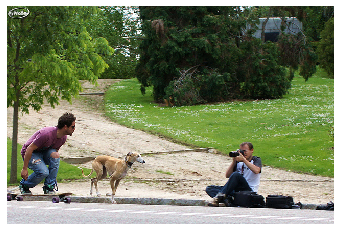

In [8]:
# Load above coco image from local disk
img_path = os.path.join(data_dir, data_year, img['file_name'])

img_file = io.imread(img_path)
plt.figure()
plt.axis('off')
plt.imshow(img_file)
plt.show()

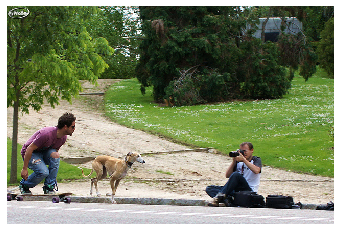

In [9]:
# Load the coco image from the server
img_file = io.imread(img['coco_url'])
plt.figure()
plt.axis('off')
plt.imshow(img_file)
plt.show()

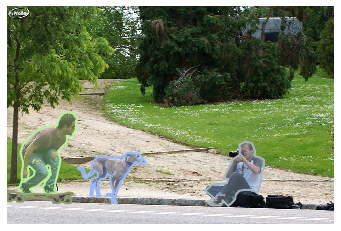

In [10]:
# COCO MASK API for object detection or image segmentation
plt.imshow(img_file)
plt.axis('off')
ann_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
# Load annoations
anns = coco.loadAnns(ann_ids)
coco.showAnns(anns)

In [11]:
# COCO object keypoints
# The annotation file is different

data_dir = COCO_DATA_PATH
data_year = 'train2014'
annotation_filename = 'person_keypoints_%s.json'%(data_year)
annotation_file = os.path.join(data_dir, 'annotations', annotation_filename)
coco_kps = COCO(annotation_file)

loading annotations into memory...
Done (t=4.61s)
creating index...
index created!


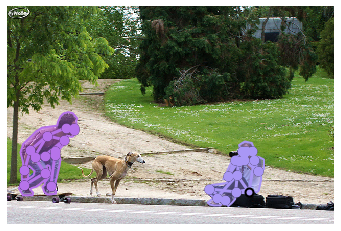

In [12]:
plt.imshow(img_file)
plt.axis('off')
ann_ids = coco_kps.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
# Load annoations
anns = coco_kps.loadAnns(ann_ids)
coco_kps.showAnns(anns)

In [13]:
# Load coco image captions
data_dir = COCO_DATA_PATH
data_year = 'train2014'
annotation_filename = 'captions_%s.json'%(data_year)
annotation_file = os.path.join(data_dir, 'annotations', annotation_filename)
coco_caps = COCO(annotation_file)

loading annotations into memory...
Done (t=0.56s)
creating index...
index created!


A man riding a skateboard next to his dog as another man takes a picture of them.
A man is sitting on a curb taking a picture of a skateboarder and a dog.
A dog walking along a man on a skate board, while another man on the side walk holds up a camera.
A person sitting on the side of the road taking a picture of a man riding a skateboard next to a dog.
The man on the skateboard and the dog are getting their picture taken.


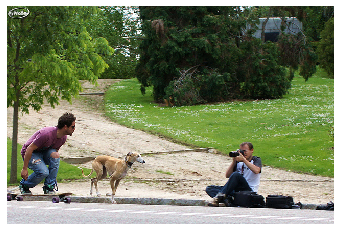

In [14]:
plt.imshow(img_file)
plt.axis('off')
ann_ids = coco_caps.getAnnIds(imgIds=img['id'])
# Load annoations
anns = coco_caps.loadAnns(ann_ids)
coco_caps.showAnns(anns)